In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Cleaning:
- Missing Values

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

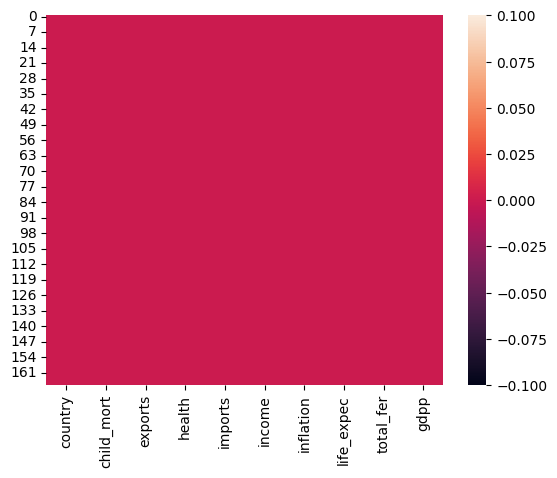

In [7]:
sns.heatmap(data.isnull())

### EDA

### Univariate Analysis

In [8]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [9]:
data.columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

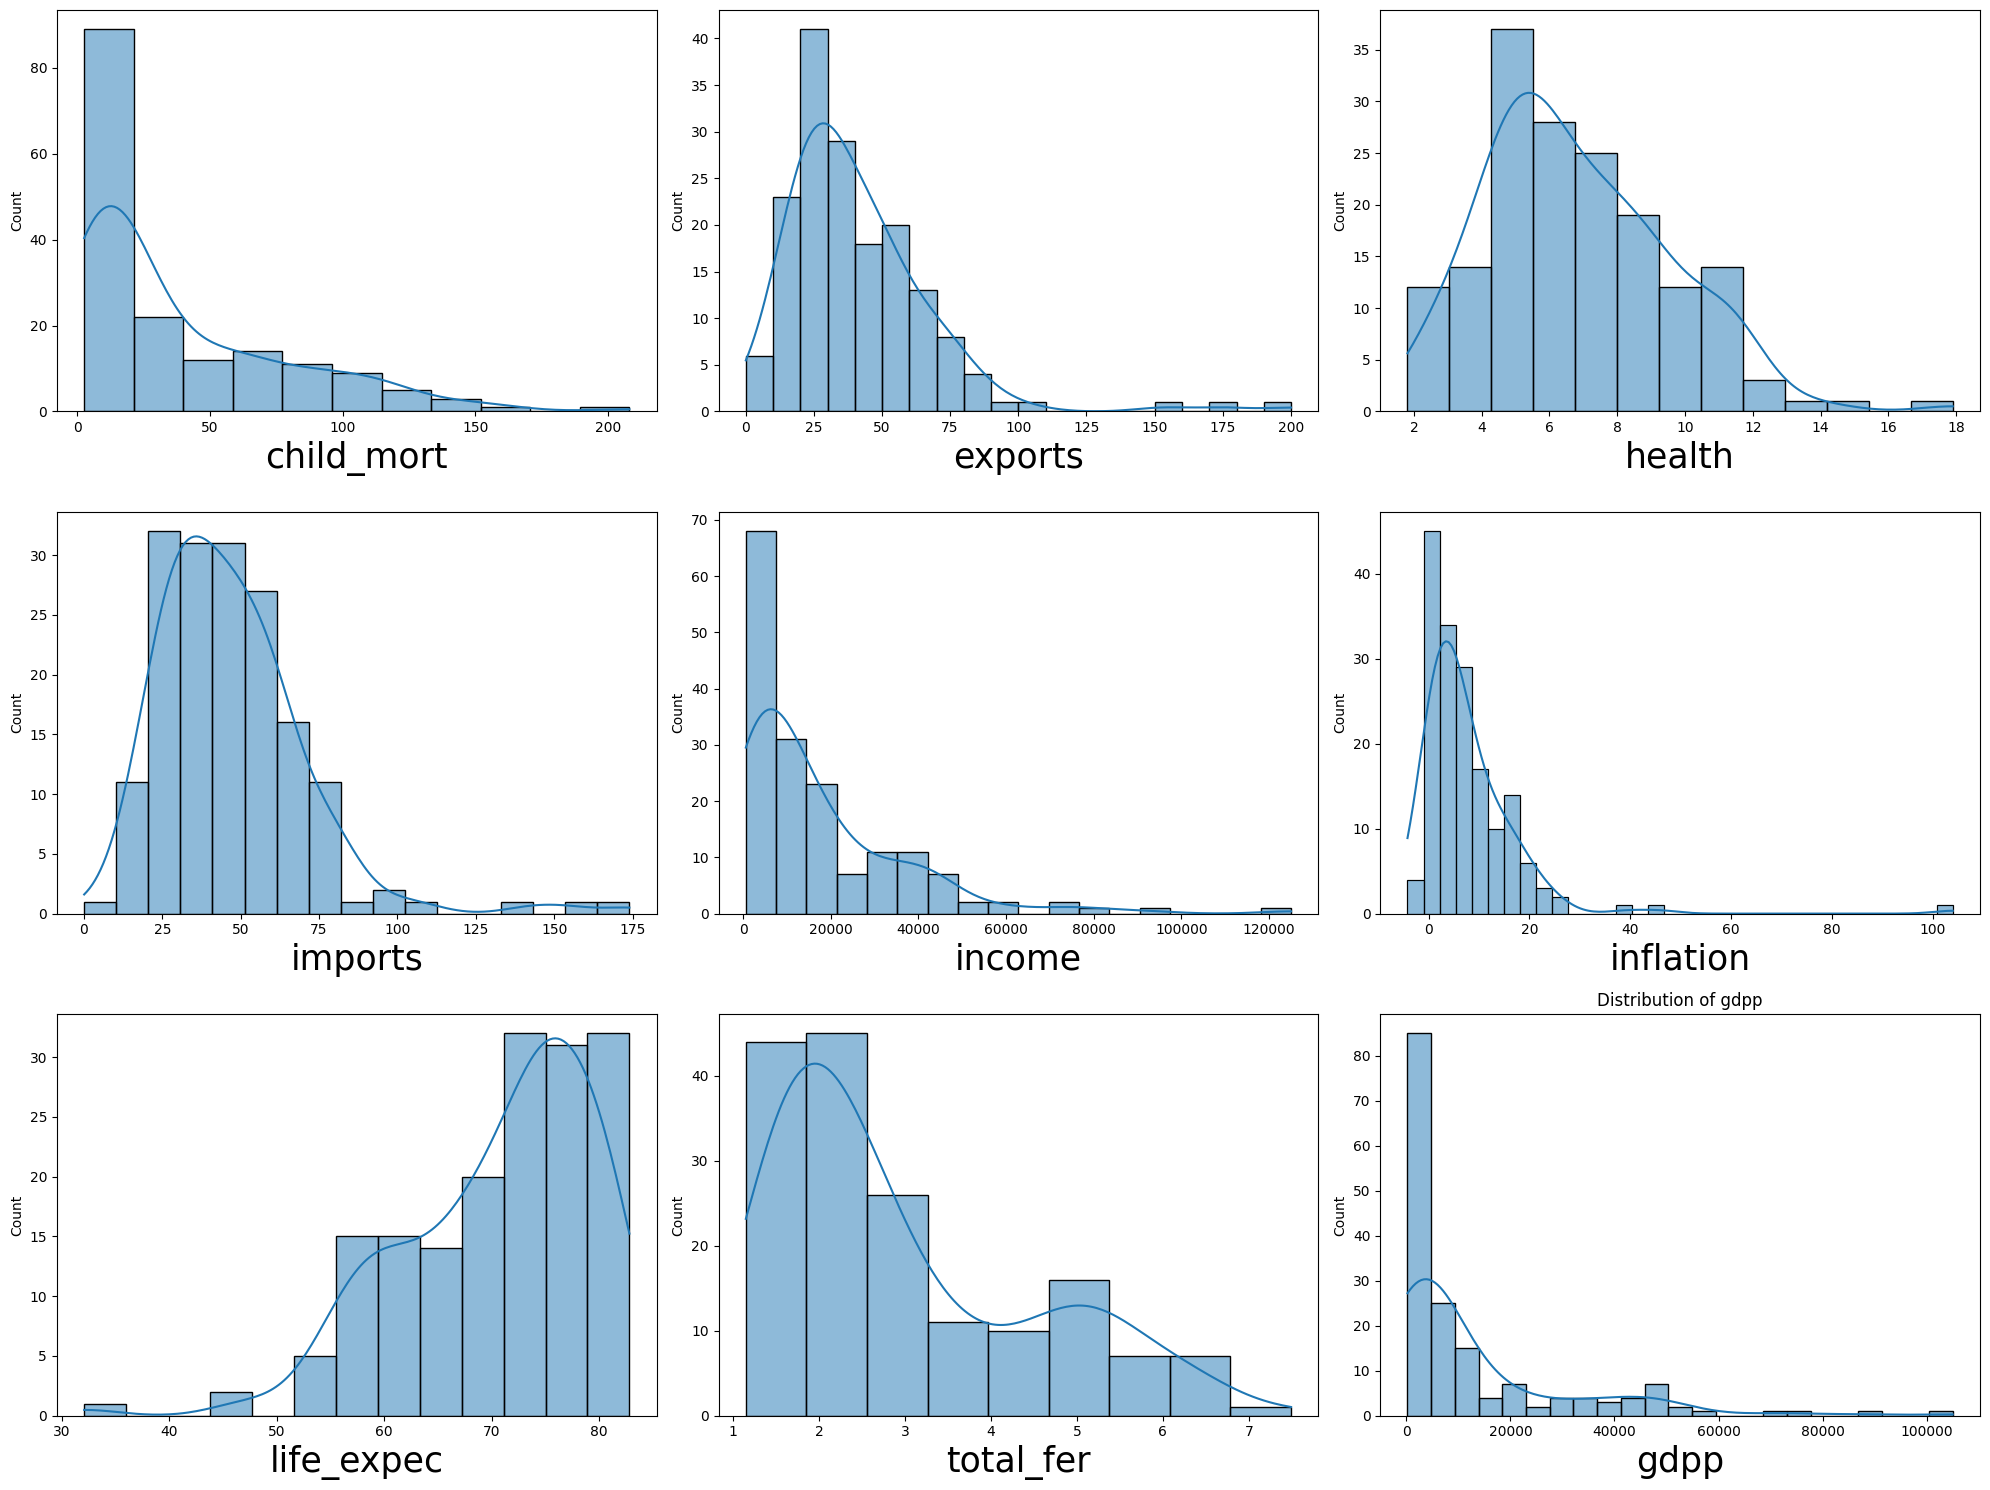

In [10]:
n_features = len(data.columns[1:])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

position = axes.flatten()

for index, column_name in enumerate(data.columns[1:]):
    myplot = sns.histplot(data[column_name], kde=True, ax=position[index])
    plt.title(f"Distribution of {column_name}")
    myplot.set_xlabel(column_name, size=25)

plt.tight_layout()
plt.show()

- child_mort: Right-skewed, most countries have low child mortality (below 50), but some exceed 100, indicating disparities in health outcomes.

- exports/imports: Both right-skewed, most countries have moderate export/import percentages (below 75%), but some exceed 100%, showing reliance on trade.

- health: Right-skewed, most countries spend 4-8% of GDP on health, with some spending up to 16%, indicating differences in healthcare investment.

- income: Heavily right-skewed, with most countries earning below $40,000, but a few wealthy countries show large disparities.

- inflation: Right-skewed, with most inflation rates below 20%, but some countries face hyperinflation (up to 100%).

- life_expec: Left-skewed, most countries have high life expectancy (60-80 years), with a few facing severe health challenges.

- total_fer: Right-skewed, with most fertility rates between 2-4 children, but some over 5.

- gdpp: Highly skewed, most countries have low GDP per capita, while a few are extremely wealthy.

### Bivariate Analysis

In [11]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


### socio-economic vs health metrics

#### View correlation between the features.

<Axes: >

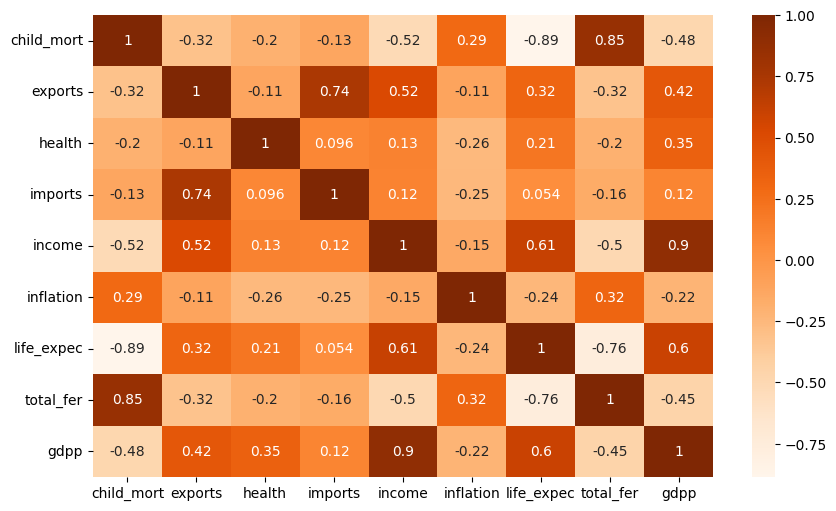

In [12]:
# Create a new dataframe to view only the numerical features in correlation
numerical_df = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="Oranges" ,cbar=True)

### Life Expectancy vs Income

In [13]:
sns.set_style("darkgrid")

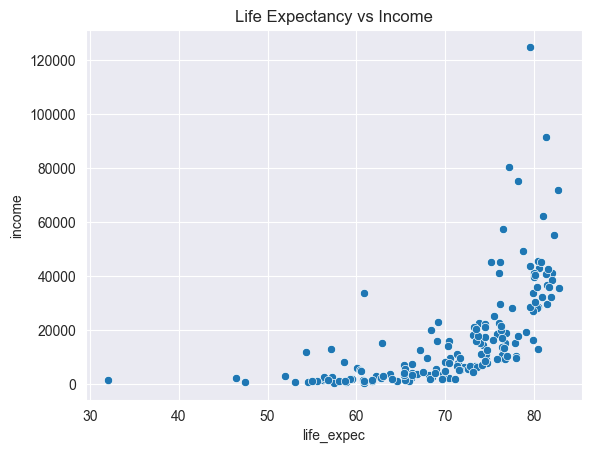

In [14]:
sns.scatterplot(x="life_expec", y="income", data=data)
plt.title("Life Expectancy vs Income")
plt.show()

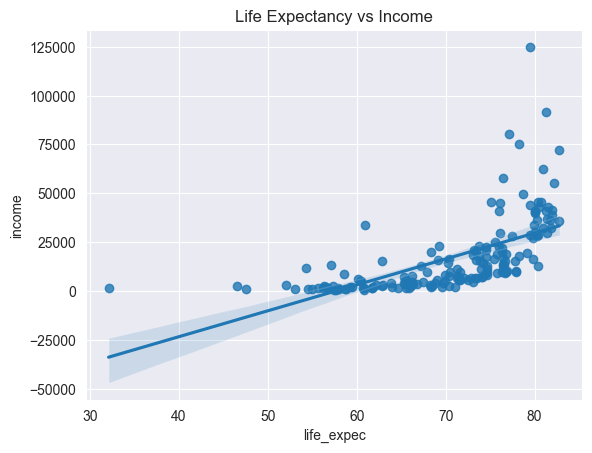

In [15]:
sns.regplot(x="life_expec", y="income", data=data)
plt.title("Life Expectancy vs Income")
plt.show()

In [16]:
data.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


### GDP vs Child Mortality

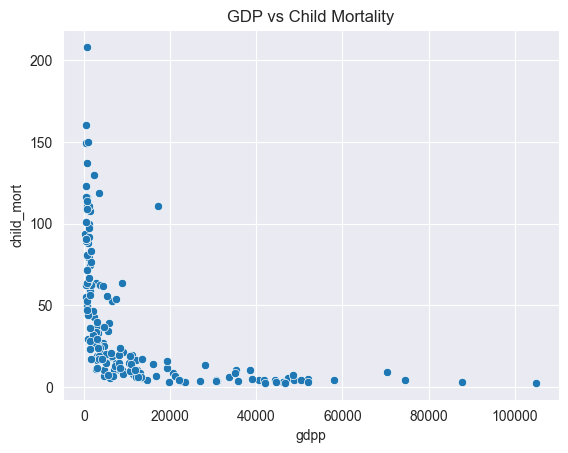

In [17]:
sns.scatterplot(x="gdpp", y="child_mort", data=data)
plt.title("GDP vs Child Mortality")
plt.show()

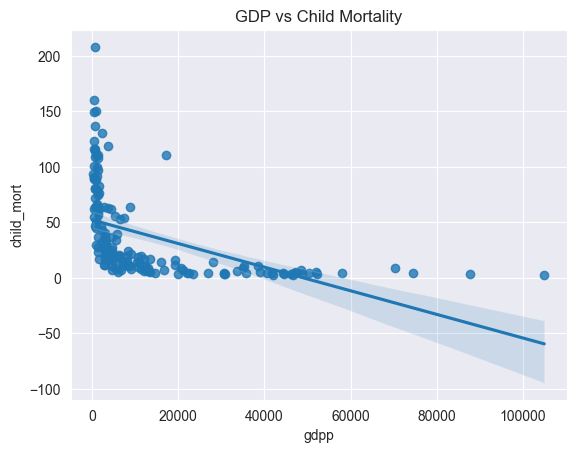

In [18]:
sns.regplot(x="gdpp", y="child_mort", data=data)
plt.title("GDP vs Child Mortality")
plt.show()

### Health Spending vs Life Expectancy

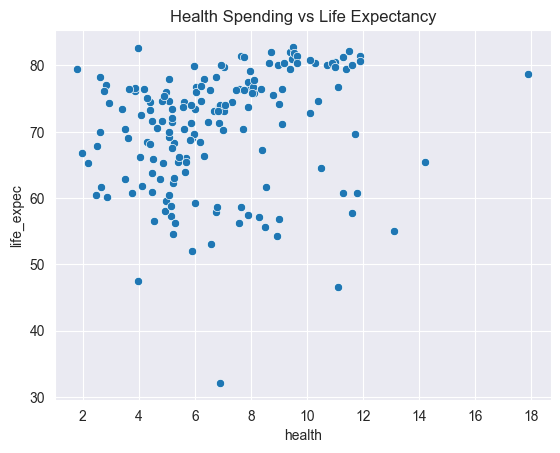

In [19]:
sns.scatterplot(x="health", y="life_expec", data=data)
plt.title("Health Spending vs Life Expectancy")
plt.show()

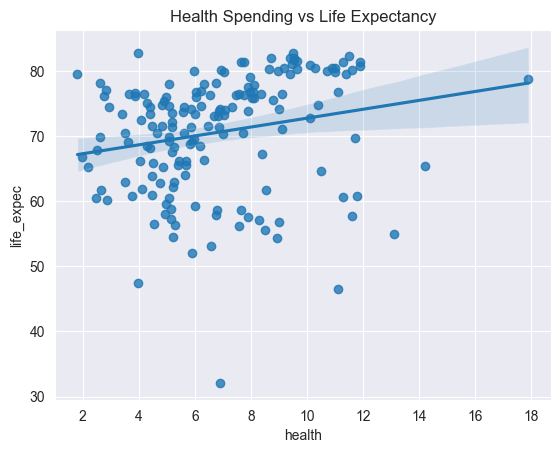

In [20]:
sns.regplot(x="health", y="life_expec", data=data)
plt.title("Health Spending vs Life Expectancy")
plt.show()

### Health spending vs Income

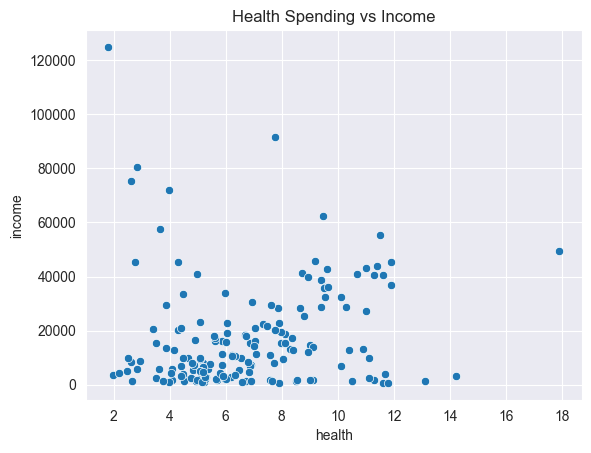

In [21]:
sns.scatterplot(x="health", y="income", data=data)
plt.title("Health Spending vs Income")
plt.show()

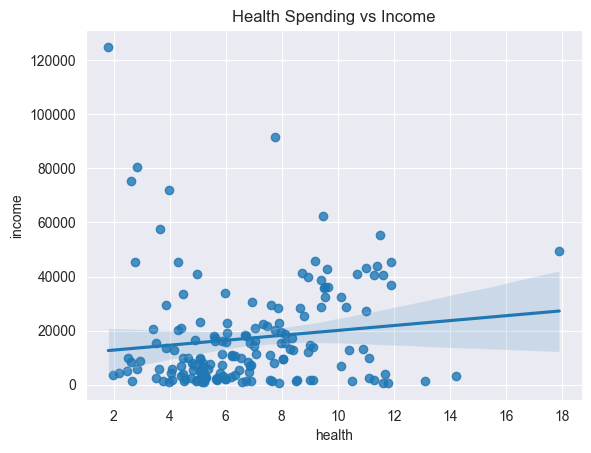

In [22]:
sns.regplot(x="health", y="income", data=data)
plt.title("Health Spending vs Income")
plt.show()

# TODO:

## Within Health metrics Analysis


### Child Mortality vs. Life Expectancy:
Objective: Investigate if countries with higher child mortality rates have lower life expectancy.

### Health Spending vs. Life Expectancy:
Objective: Analyze whether countries that spend more on healthcare have a longer life expectancy.

### Health Spending vs. Child Mortality:
Objective: Examine if increased health spending reduces child mortality rates.

### Total Fertility Rate vs. Life Expectancy:
Objective: Investigate whether countries with higher fertility rates tend to have lower life expectancy.

In [23]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


### Child Mortality vs. Life Expectancy:
Objective: Investigate if countries with higher child mortality rates have lower life expectancy

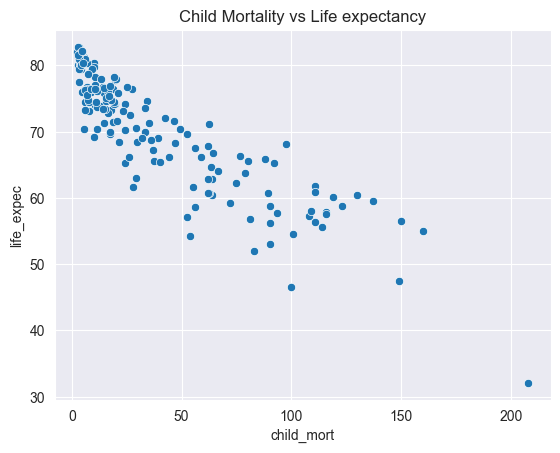

In [24]:
sns.scatterplot(x="child_mort", y="life_expec", data=data)
plt.title("Child Mortality vs Life expectancy")
plt.show()

You have a someworth negative correlation, where we have most countries with relatively high life expectancy of about 80 - 70, having low child mortality, with few countries having a medium life expectancy and almost medium child mortality.

### Health Spending vs. Life Expectancy:
Objective: Analyze whether countries that spend more on healthcare have a longer life expectancy.

In [25]:
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


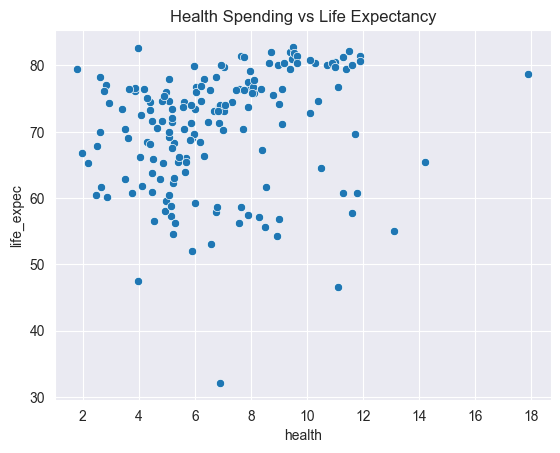

In [26]:
sns.scatterplot(x="health", y="life_expec", data=data)
plt.title("Health Spending vs Life Expectancy")
plt.show()

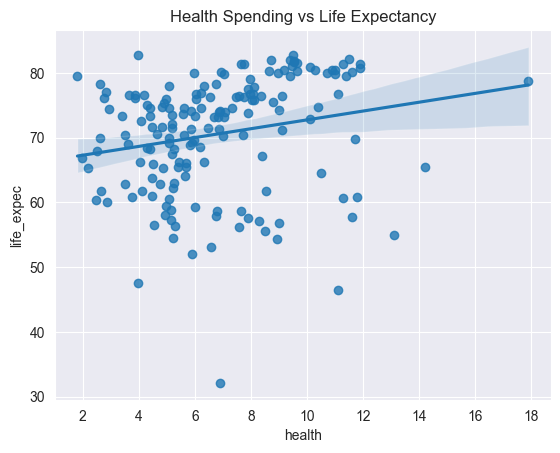

In [27]:
sns.regplot(x="health", y="life_expec", data=data)
plt.title("Health Spending vs Life Expectancy")
plt.show()

There is no correlation between the life expectancy and health, having most countries with high life expectancy and a relatively low health score.

### Health Spending vs. Child Mortality:
Objective: Examine if increased health spending reduces child mortality rates.

In [28]:
data.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


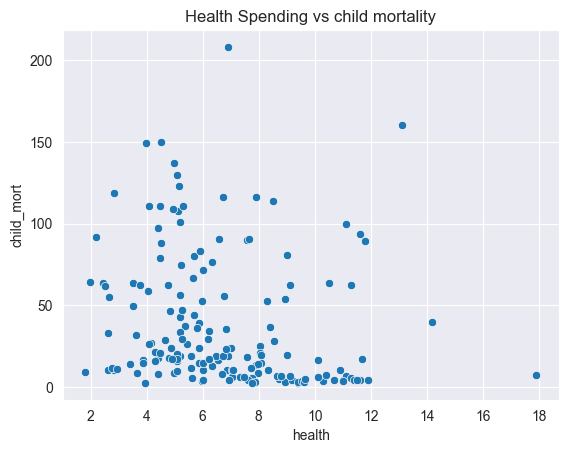

In [29]:
sns.scatterplot(x="health", y="child_mort", data=data)
plt.title("Health Spending vs child mortality")
plt.show()

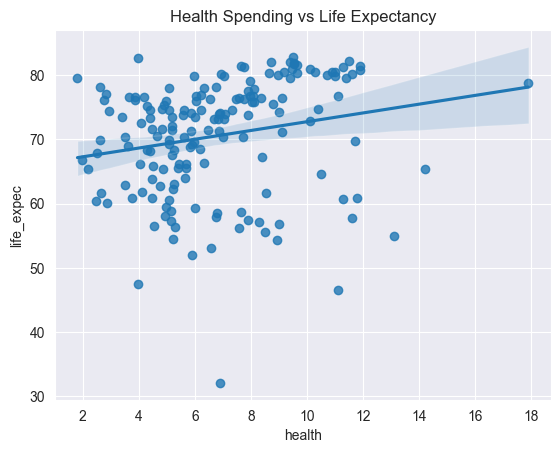

In [30]:
sns.regplot(x="health", y="life_expec", data=data)
plt.title("Health Spending vs Life Expectancy")
plt.show()

We have no correlation between health score vs life expectancy. Its almost a uniform distribution.Having most countries with relatively high life expectancy and low health sore per capital.

### Total Fertility Rate vs. Life Expectancy:
Objective: Investigate whether countries with higher fertility rates tend to have lower life expectancy.

In [31]:
data.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


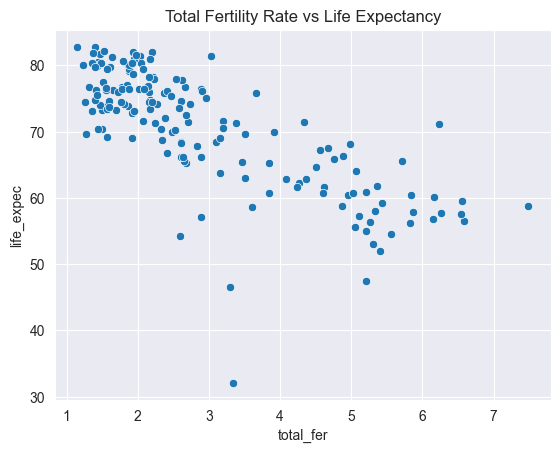

In [32]:
sns.scatterplot(x="total_fer", y="life_expec", data=data)
plt.title("Total Fertility Rate vs Life Expectancy")
plt.show()

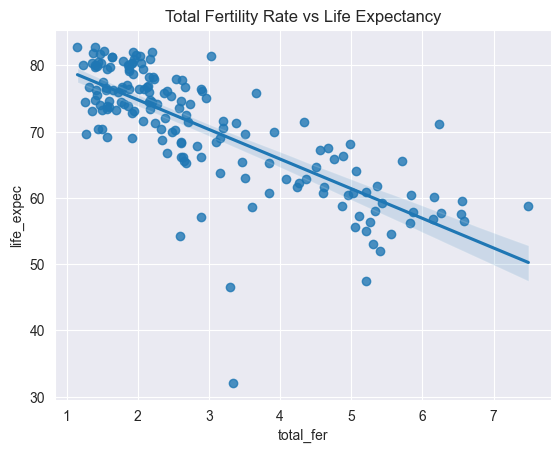

In [33]:
sns.regplot(x="total_fer", y="life_expec", data=data)
plt.title("Total Fertility Rate vs Life Expectancy")
plt.show()

There is a negative correlation between the total fertility rate and life expectancy, with most countries having a high life expectancy and low total fertility rate.

### Top 5 countries with the highest child mortality

In [34]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [35]:
data.sort_values(by="child_mort", ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [36]:
data.sort_values(by="child_mort", ascending=False)[:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [37]:
top_5_child_mort = data.sort_values(by="child_mort", ascending=False).head(5)

In [38]:
top_5_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [39]:
least_5_child_mort = data.sort_values(by="child_mort", ascending=True).head(5)

In [40]:
least_5_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


<Axes: xlabel='child_mort', ylabel='country'>

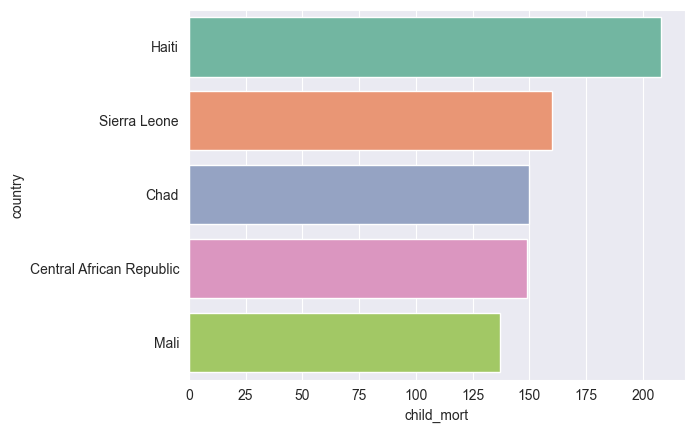

In [41]:
sns.barplot(x="child_mort", y="country", data=top_5_child_mort, orient="h", palette="Set2")

<Axes: xlabel='child_mort', ylabel='country'>

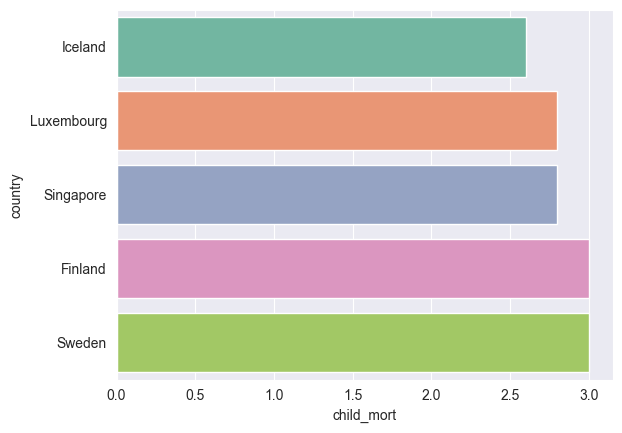

In [42]:
sns.barplot(x="child_mort", y="country", data=least_5_child_mort, orient="h", palette="Set2")

## TODO: 
Perform bivariate EDA on the following:

1. Countries Exports levels (High, Least)
2. Countries Health Spending levels (High, Least)
3. Countries Life Expectancy levels (High, Least)
4. Countries Female Fertility Rate levels (High, Least)
5. Countries GDP Contribution /Person levels (High, Least)




In [77]:
data.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,High Priority (Requires foreign immediately)


#### Countries Exports levels (High, Least)

In [83]:
least_5_exports = data.sort_values(by="exports", ascending=True).head(5)
highest_5_exports = data.sort_values(by="exports", ascending=False).head(5)

#### Countries Health Spending levels (High, Least)

In [ ]:
least_5_health = data.sort_values(by="health", ascending=True).head(5)
highest_5_health = data.sort_values(by="health", ascending=False).head(5)

#### Countries Life Expectancy levels (High, Least)

In [ ]:
least_5_life_expec = data.sort_values(by="life_expec", ascending=True).head(5)
highest_5_life_expec = data.sort_values(by="life_expec", ascending=False).head(5)

#### Countries Female Fertility Rate levels (High, Least)

In [ ]:
least_5_total_fer = data.sort_values(by="total_fer", ascending=True).head(5)
highest_5_total_fer = data.sort_values(by="total_fer", ascending=False).head(5)

#### Countries GDP Contribution /Person levels (High, Least)

In [ ]:
least_5_gdpp = data.sort_values(by="gdpp", ascending=True).head(5)
highest_5_gdpp = data.sort_values(by="gdpp", ascending=False).head(5)

## Multivariate Analysis (using heatmap for correlation analysis)

<Axes: >

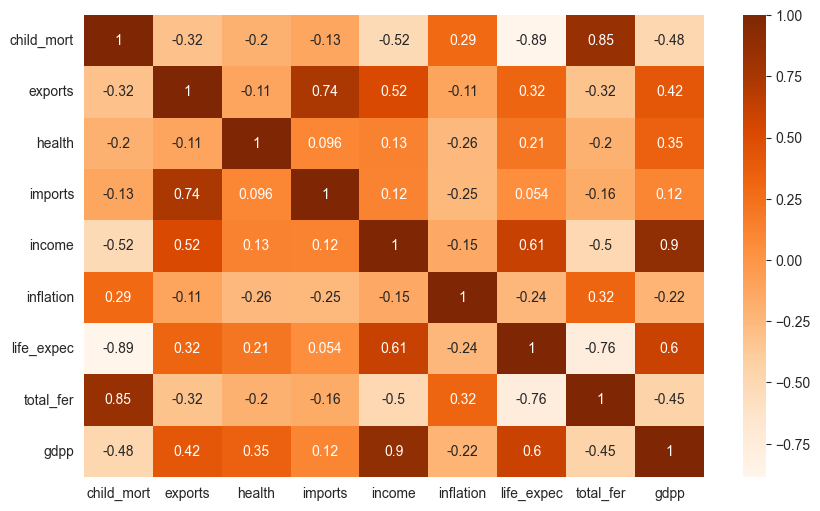

In [43]:
# Create a new dataframe to view only the numerical features in correlation
numerical_df = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="Oranges" ,cbar=True)

# Feature Engineering

### Some features belong to similar categories and behave similarly with features from other categories:

### Lets create new features that fall into the three categories:

1. Health: child mortality, health, life expectancy, total fertility rate
2. Trade: imports, exports
3. Finance: income, inflation, GDP per capita

### Health Metrics
- Child Mortality (child_mort): Higher values indicate poorer health outcomes, so we want to invert this relationship.
- Life Expectancy (life_expec): Higher values are positive indicators of health.
- Health Spending (health): Higher values indicate better health investment, so this should be a positive contributor.
- Total Fertility Rate (total_fer): This can indicate population growth, but higher rates might also suggest challenges in health outcomes.

In [44]:
data["life_expec"]

0      56.2
1      76.3
2      76.5
3      60.1
4      76.8
       ... 
162    63.0
163    75.4
164    73.1
165    67.5
166    52.0
Name: life_expec, Length: 167, dtype: float64

In [45]:
data["life_expec"] / data["life_expec"].mean()

0      0.796534
1      1.081415
2      1.084250
3      0.851809
4      1.088502
         ...   
162    0.892912
163    1.068659
164    1.036061
165    0.956691
166    0.737006
Name: life_expec, Length: 167, dtype: float64

In [46]:
data["income"] / data["income"].mean()

0      0.093907
1      0.579188
2      0.752420
3      0.344130
4      1.114048
         ...   
162    0.172065
163    0.962397
164    0.261889
165    0.261305
166    0.191313
Name: income, Length: 167, dtype: float64

### Finance Metrics
- Income (income): Higher values indicate better economic health.
- GDP per capita (gdpp): Also a positive economic indicator.
- Inflation (inflation): Higher inflation is generally negative for financial health.


In [47]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [48]:
new_data = pd.DataFrame()

In [49]:
new_data["Health"] = (
    (data["life_expec"] / data["life_expec"].mean()) + 
    (data["health"] / data["health"].mean()) - 
    (data["child_mort"] / data["child_mort"].mean()) - 
    (data["total_fer"] / data["total_fer"].mean())
)

new_data["Trade"] = (data["imports"] / data["imports"].mean()) + (data["exports"] / data["exports"].mean()) 

new_data["Finance"] = (
    (data["income"] / data["income"].mean()) + 
    (data["gdpp"] / data["gdpp"].mean()) - 
    (data["inflation"] / data["inflation"].mean()) 
)

In [50]:
new_data.head()

,Health,Trade,Finance
0,-2.422504,1.200812,-1.076519
1,1.048966,1.717580,0.317688
2,0.002385,1.603752,-0.972476
3,-3.929096,2.430387,-2.262080
4,0.981553,2.362940,1.870058


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


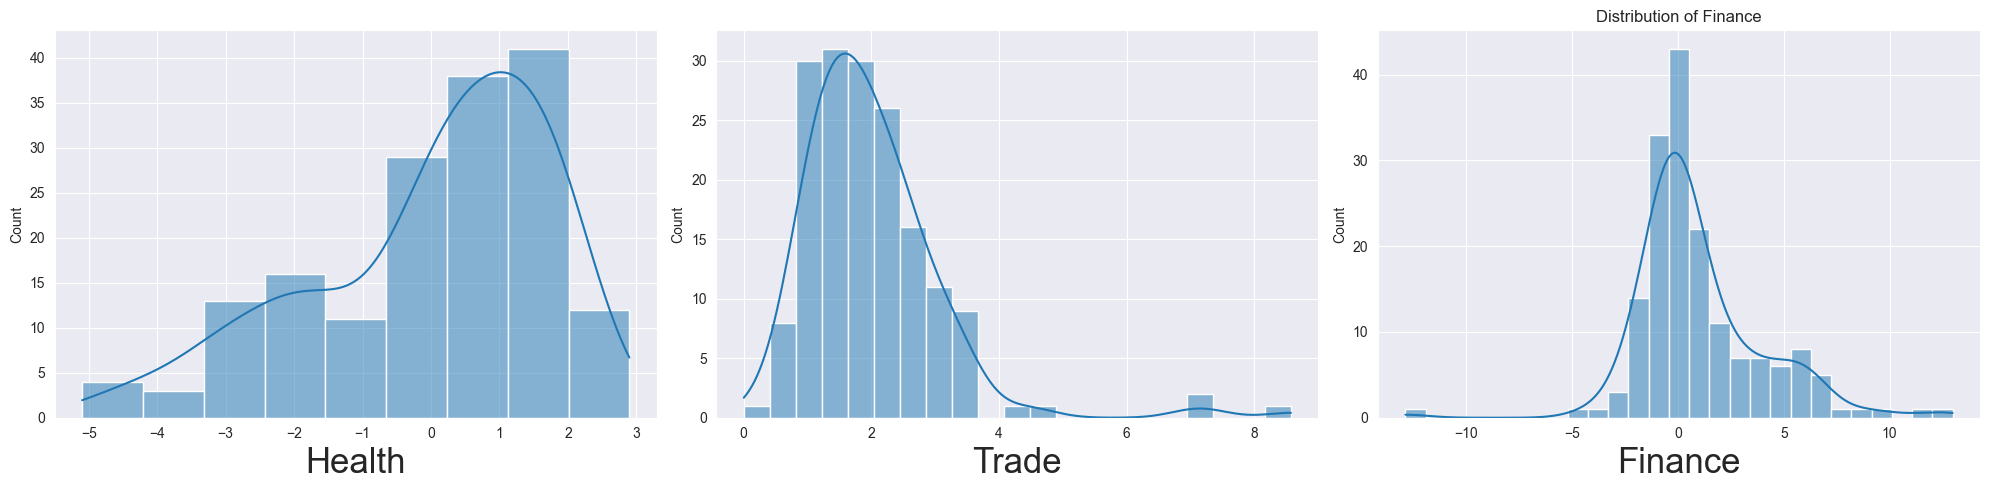

In [51]:
n_features = len(new_data.columns)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

position = axes.flatten()

for index, column_name in enumerate(new_data.columns):
    myplot = sns.histplot(new_data[column_name], kde=True, ax=position[index])
    plt.title(f"Distribution of {column_name}")
    myplot.set_xlabel(column_name, size=25)

plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
new_data["Health"] = scaler.fit_transform(new_data[["Health"]])

In [55]:
new_data["Trade"] = scaler.fit_transform(new_data[["Trade"]])
new_data["Finance"] = scaler.fit_transform(new_data[["Finance"]])

In [56]:
new_data.head()

,Health,Trade,Finance
0,-1.384975,-0.726043,-0.684496
1,0.599706,-0.256572,-0.224915
2,0.001363,-0.359982,-0.650200
3,-2.246312,0.390996,-1.075300
4,0.561166,0.329722,0.286803


### Modelling (K-means)

In [57]:
from sklearn.cluster import KMeans

In [58]:
# within-clusters sum of squares (wcss)

In [59]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(new_data)
    wcss.append(model.inertia_)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

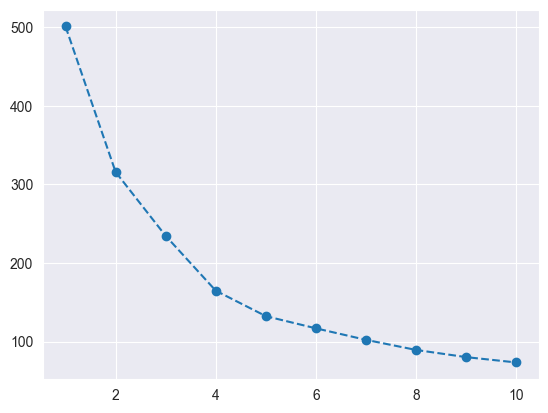

In [60]:
plt.plot(range(1,11), wcss, marker="o", linestyle="--")

In [61]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=1000)
model.fit(new_data)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [62]:
clusters = model.cluster_centers_

In [63]:
clusters

array([[ 0.2806149 , -0.04876175, -0.29456759],
       [-1.47529566, -0.44918186, -0.76665047],
       [ 0.93636014,  0.56003964,  1.38885359]])

In [64]:
new_data.head()

,Health,Trade,Finance
0,-1.384975,-0.726043,-0.684496
1,0.599706,-0.256572,-0.224915
2,0.001363,-0.359982,-0.650200
3,-2.246312,0.390996,-1.075300
4,0.561166,0.329722,0.286803


In [65]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [66]:
data["class"] = model.labels_

In [67]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [68]:
data["class"].value_counts()

class
0    84
1    42
2    41
Name: count, dtype: int64

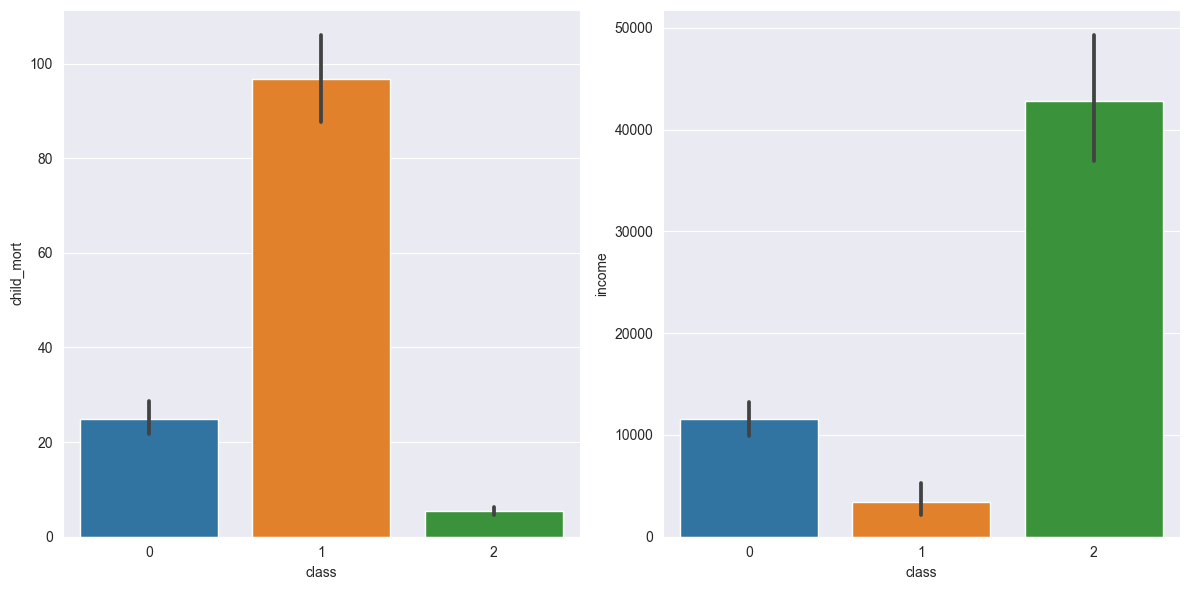

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x="class", y="child_mort", data=data)
plt.subplot(1,2,2)
sns.barplot(x="class", y="income", data=data)
plt.tight_layout()

- 0: Not a priority
- 1: High Priority (Requires foreign immediately)
- 2: Do NOT require foreign aid 

In [70]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [71]:
data["class"][data["class"]==0] = "Not a Priority"
data["class"][data["class"]==1] = "High Priority (Requires foreign immediately)"
data["class"][data["class"]==2] = "Do NOT require foreign aid"

C:\Users\User\AppData\Local\Temp\ipykernel_14452\3449857161.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["class"][data["class"]==0] = "Not a Priority"
C:\Users\User\AppData\Local\Temp\ipykernel_14452\3449857161.py:1: SettingWithC

In [72]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,High Priority (Requires foreign immediately)
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not a Priority
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not a Priority
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,High Priority (Requires foreign immediately)
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not a Priority


In [73]:
data["class"].value_counts()

class
Not a Priority                                  84
High Priority (Requires foreign immediately)    42
Do NOT require foreign aid                      41
Name: count, dtype: int64

In [74]:
import plotly.express as px

In [75]:
# choropleth

In [85]:
# 0: Not a priority
# 1: High Priority (Requires foreign immediately)
# 2: Do NOT require foreign aid

In [86]:
fig = px.choropleth(data[["country", "class"]],
                   locationmode="country names",
                    locations="country",
                    color=data["class"],
                    color_discrete_map = {"High Priority (Requires foreign immediately)": "Red",
                                          "Do NOT require foreign aid": "Green",
                                          "Not a Priority": "Yellow"
                                         }
                   )

fig.update_layout(legend_title_text="Color Maps")
fig.show()

c:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Training the data without performing future engineeering

In [87]:
numerical_df.head(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


#### Determine the kind of normalizer to use by viewing the distribution of the individual features of just the numerical columns of the original data.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

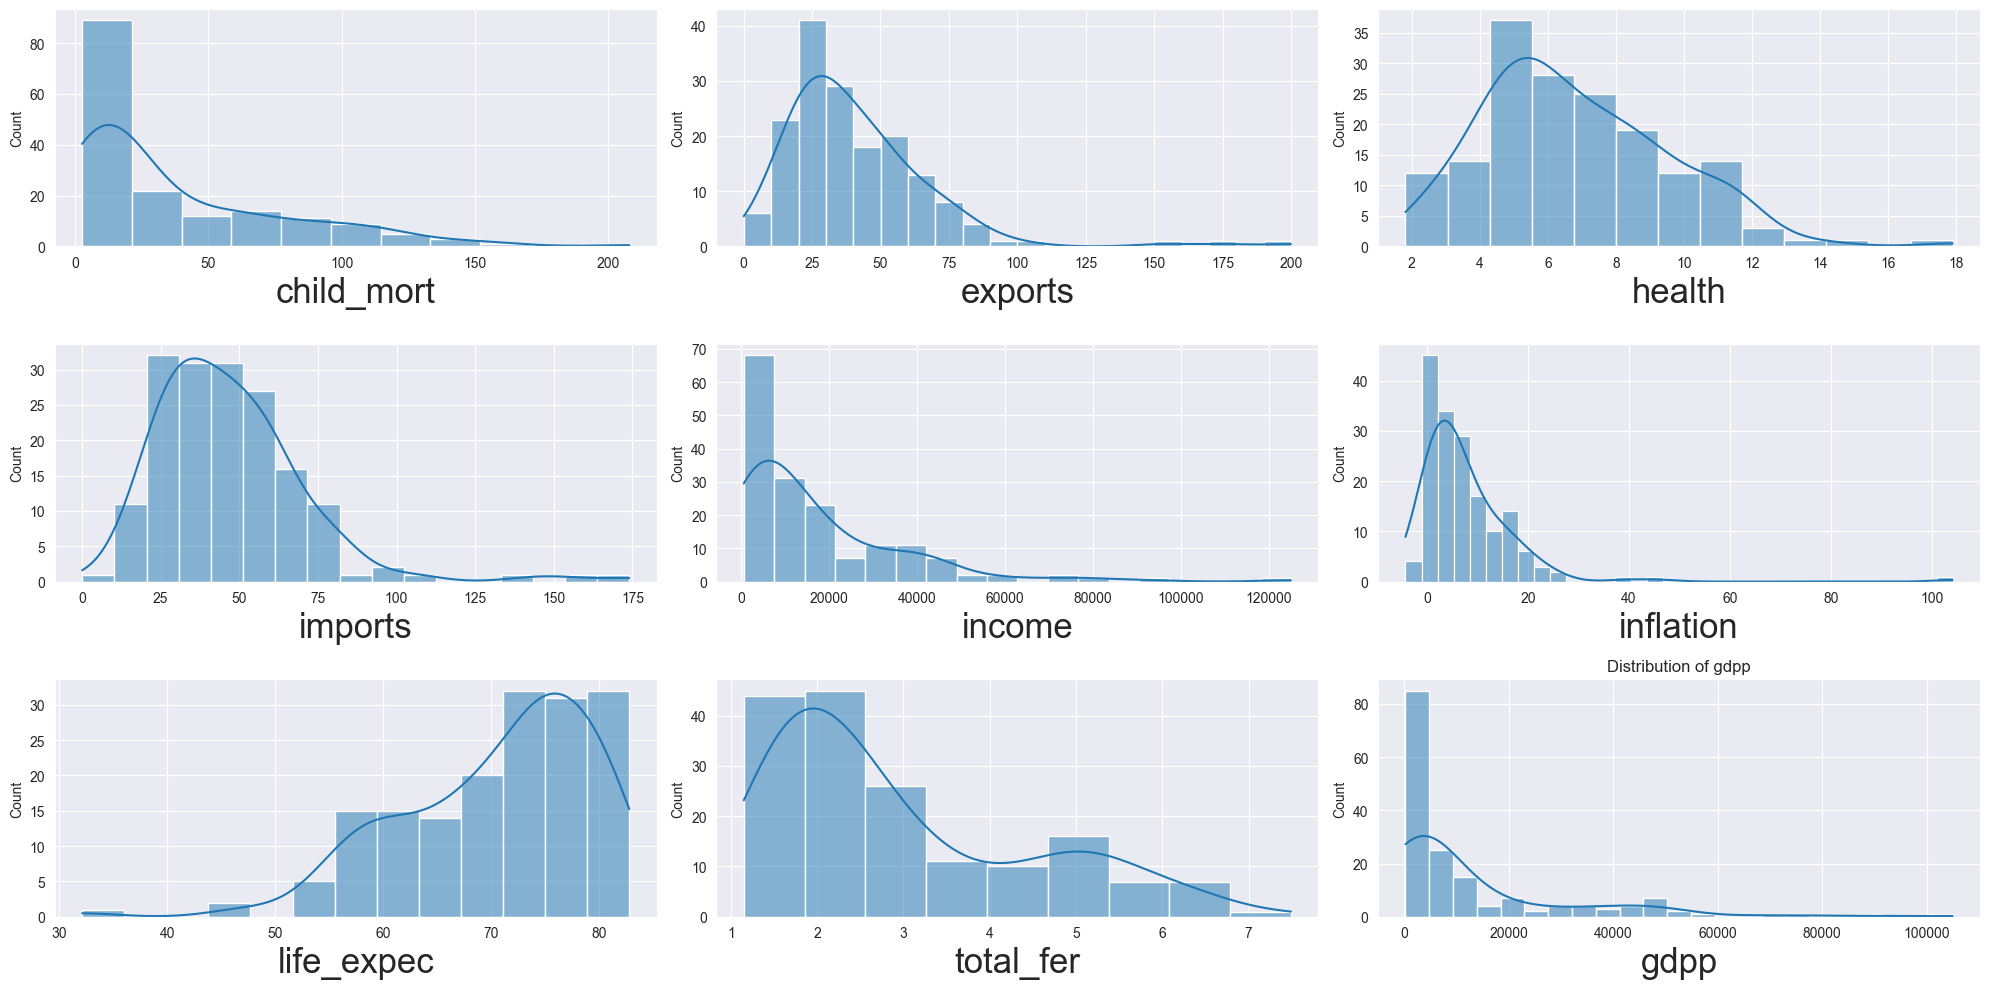

In [89]:
n_features = len(numerical_df.columns)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))

position = axes.flatten()

for index, column_name in enumerate(numerical_df.columns):
    myplot = sns.histplot(numerical_df[column_name], kde=True, ax=position[index])
    plt.title(f"Distribution of {column_name}")
    myplot.set_xlabel(column_name, size=25)

plt.tight_layout()
plt.show()

In [92]:
numerical_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Because the distribution is mostly skewed, we will use the RobustScaler to normalize the data.

In [90]:
from sklearn.preprocessing import RobustScaler

In [91]:
# initialize the scaler
encoder = RobustScaler()

In [95]:
# iteratively use the RobustScaler encoder to scale/normalize the data.
for  column_name in numerical_df.columns:
    numerical_df[column_name] = scaler.fit_transform(numerical_df[[column_name]])

In [96]:
numerical_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [97]:
# Modelling/Training using Kmeans with a cluster of 3 as already discussed in class
model = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=1000)
model.fit(numerical_df)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [98]:
# Execute clusters 
clusters = model.cluster_centers_

In [99]:
clusters

array([[-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536],
       [ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141]])

In [100]:
# View the new labels
model.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [101]:
# Create an additional column to the original data of the new labels called class_1
data["class_1"] = model.labels_

In [102]:
# View the original data
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,class_1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,High Priority (Requires foreign immediately),1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not a Priority,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not a Priority,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,High Priority (Requires foreign immediately),1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not a Priority,2


In [103]:
# convert the class_1 values to categorical data for better understanding
data["class_1"][data["class_1"]==0] = "Not a Priority"
data["class_1"][data["class_1"]==1] = "High Priority (Requires foreign immediately)"
data["class_1"][data["class_1"]==2] = "Do NOT require foreign aid"

C:\Users\User\AppData\Local\Temp\ipykernel_14452\558608408.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\User\AppData\Local\Temp\ipykernel_14452\558608408.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy o

In [104]:
# view result
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,class_1
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,High Priority (Requires foreign immediately),High Priority (Requires foreign immediately)
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not a Priority,Do NOT require foreign aid
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not a Priority,Do NOT require foreign aid
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,High Priority (Requires foreign immediately),High Priority (Requires foreign immediately)
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not a Priority,Do NOT require foreign aid


In [105]:
# Using plotly.express, plot a map of your new class_1
fig = px.choropleth(data[["country", "class_1"]],
                   locationmode="country names",
                    locations="country",
                    color=data["class_1"],
                    color_discrete_map = {"High Priority (Requires foreign immediately)": "Red",
                                          "Do NOT require foreign aid": "Green",
                                          "Not a Priority": "Yellow"
                                         }
                   )

fig.update_layout(legend_title_text="Color Maps")
fig.show()

c:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### Model Evaluation using the classification report and confusion matrix 

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
report = classification_report(data["class"],data["class_1"])
matrix = confusion_matrix(data["class"], data["class_1"])

In [112]:
print(report)

                                              precision    recall  f1-score   support

                  Do NOT require foreign aid       0.06      0.12      0.08        41
High Priority (Requires foreign immediately)       0.85      0.95      0.90        42
                              Not a Priority       0.00      0.00      0.00        84

                                    accuracy                           0.27       167
                                   macro avg       0.30      0.36      0.33       167
                                weighted avg       0.23      0.27      0.25       167



The Confusion matrix is as follows :


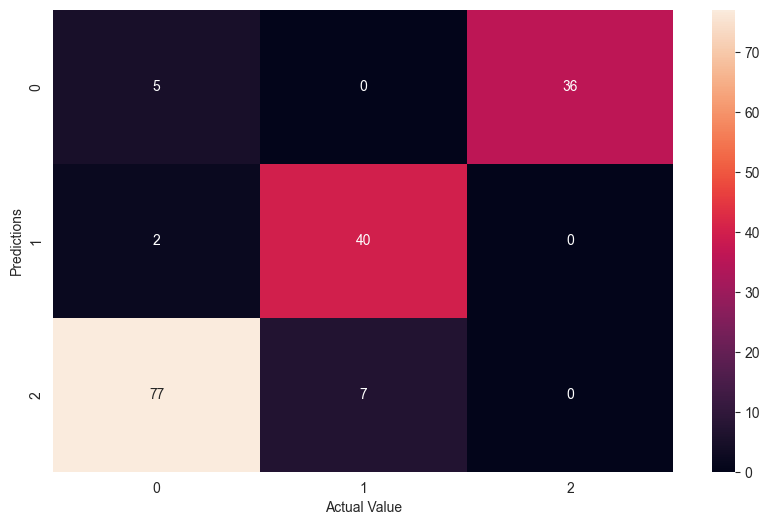

In [114]:
print(f"The Confusion matrix is as follows :")
plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, fmt='g')
plt.ylabel('Predictions')
plt.xlabel('Actual Value')
plt.show()